# Stroke Prediction

---
**1. Importing the necessary libraries**

In [1]:
# To prevent the annoying warning from scikit learn package
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
cmap = sns.cm.mako_r

%matplotlib inline

**2. Importing the Data using Pandas read_csv(). And calling head() and info() on the DataFrame**

In [4]:
stroke = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

In [5]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke.drop(columns=['id']).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
stroke['age']

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64

---
**3. Preprocessing Data before Exploratory Data Analysis**

1. Using **round()** to round off Age.
2. Setting values to **NaN** where BMI is less than **12** and greater than **60**. Found out from google search that these can be considered as outliers
3. We will sort the DataFrame first based on **Gender** then on **Age** and use **Forward Filling** to fill those missing BMI values.

In [11]:
# Round of Age
stroke['age'] = stroke['age'].apply(lambda x : round(x))

In [12]:
stroke['age']

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

In [13]:
# BMI to NaN
stroke['bmi'] = stroke['bmi'].apply(lambda bmi_value : bmi_value if 12 < bmi_value < 60 else np.nan)

In [19]:
stroke['bmi'].isnull().sum()

218

In [22]:
# Sorting DataFrame based on Gender then on Age and using Forward Fill-ffill () to fill NaN value for BMI
stroke.sort_values(['gender','age'], inplace=True)

In [25]:
stroke.reset_index(drop=True, inplace=True)

In [26]:
stroke['bmi'].ffill(inplace=True)

In [27]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


Now we have **Age** Column as *int64* and no missing values in **Bmi** Column

---


**4. Exploratory Data Analysis on Stroke Prediction Data**

1. Check if the Data is Balanced
2. Plotting various graphs to check relation between the each column with respect to stroke
    - Age vs BMI with Stroke as hue
    - BMI as Avg Glucose level
    - Percentage of people who got stroked in each category

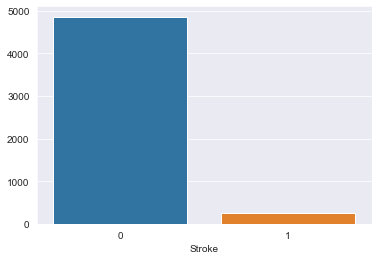

In [29]:
# Checking if Data is balanced
xs = stroke['stroke'].value_counts().index
ys = stroke['stroke'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel('Stroke')
plt.show()

As we can see from the above plot that the Data is not balanced which will result in a bad model.

To resolve this issue we can use SMOTE to balance the Data. This is will done before fitting out data to the model.

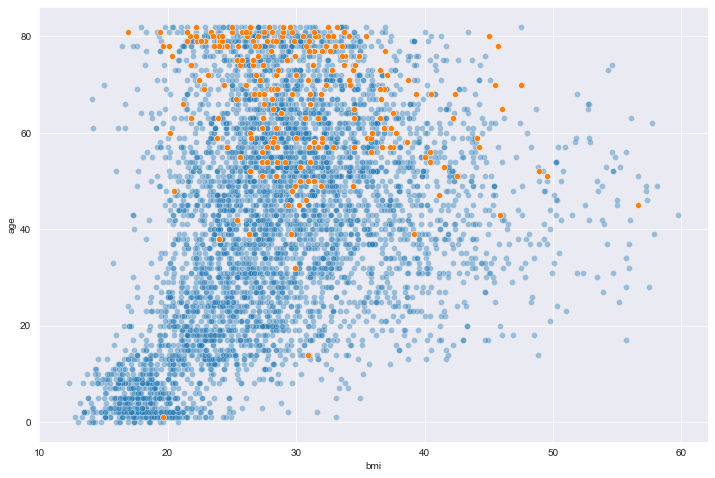

In [43]:
# Age vs BMI with hue = stroke
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='bmi', y='age', alpha=0.4, data=stroke[stroke['stroke']==0])
sns.scatterplot(x='bmi', y='age', alpha=1, data=stroke[stroke['stroke']==1], ax=ax)

plt.show()

from the above **Age vs BMI** plot we can clearly see that when people attain an age of **40** or greater than chances of getting a stroke increases and after **60+** it tends to increase even more.
Alse. people with a BMI of **25+**  have shown a higher chances of encountering a stroke.

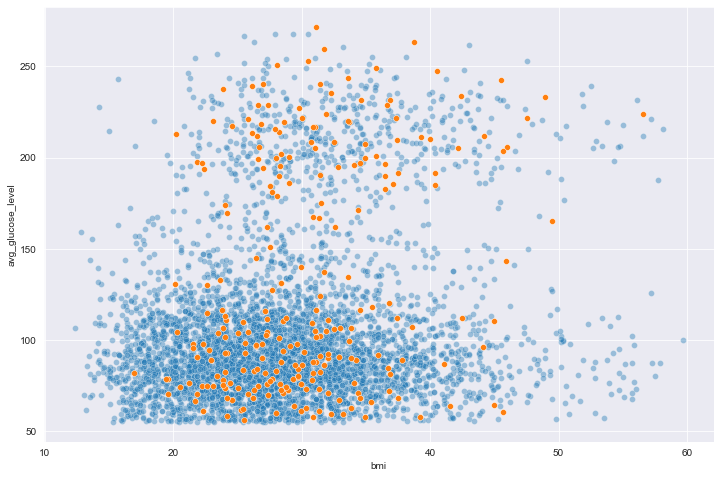

In [45]:
# avg_glucose_level vs BMI with hue = stroke
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='bmi', y='avg_glucose_level', alpha=0.4, data=stroke[stroke['stroke']==0])
sns.scatterplot(x='bmi', y='avg_glucose_level', alpha=1, data=stroke[stroke['stroke']==1],ax=ax)
plt.show()

In [52]:
# percentage of People
def plot_percent_of_stroke_in_each_category(df, column, axis):
    x_axis=[]
    y_axis=[]
    
    unique_values = df[column].unique()
    
    for value in unique_values:
        stroke_yes = len(df[(df[column]==value) & (df['stroke']==1)]) 
        total = len(df[df[column]==value])
        percentage = (stroke_yes/total) * 100
        x_axis.append(value)
        y_axis.append(percentage)
    
    sns.barplot(x_axis, y_axis, ax=axis)

    

In [56]:
stroke['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [61]:
len(stroke[(stroke['gender']=='Female') & (stroke['stroke']==1)])

141

In [62]:
len(stroke[stroke['gender']=='Female']

2994

In [64]:
141/2994 *100

4.709418837675351

In [65]:
len(stroke[(stroke['gender']=='Male') & (stroke['stroke']==1)])

108

In [53]:
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
           'work_type', 'Residence_type', 'smoking_status']

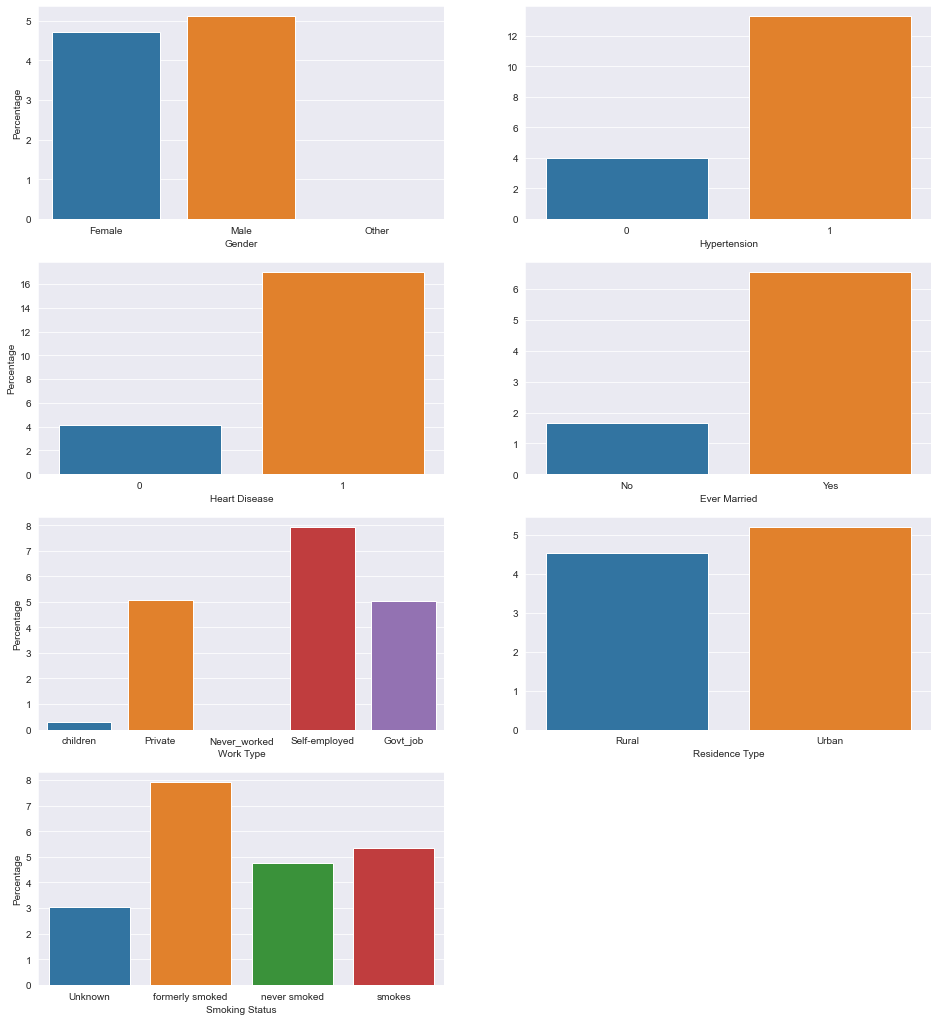

In [54]:
fig, axes= plt.subplots(4, 2, figsize=(16,18))
axes[3, 1].remove()

plot_percent_of_stroke_in_each_category(stroke, 'gender', axes[0,0])
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Percentage')

plot_percent_of_stroke_in_each_category(stroke, 'hypertension', axes[0,1])
axes[0,1].set_xlabel('Hypertension')

plot_percent_of_stroke_in_each_category(stroke, 'heart_disease', axes[1,0])
axes[1,0].set_xlabel('Heart Disease')
axes[1,0].set_ylabel('Percentage')

plot_percent_of_stroke_in_each_category(stroke, 'ever_married', axes[1,1])
axes[1,1].set_xlabel('Ever Married')

plot_percent_of_stroke_in_each_category(stroke, 'work_type', axes[2,0])
axes[2,0].set_xlabel('Work Type')
axes[2,0].set_ylabel('Percentage')

plot_percent_of_stroke_in_each_category(stroke, 'Residence_type', axes[2,1])
axes[2,1].set_xlabel('Residence Type')

plot_percent_of_stroke_in_each_category(stroke, 'smoking_status', axes[3,0])
axes[3,0].set_xlabel('Smoking Status')
axes[3,0].set_ylabel('Percentage')

plt.show()

**Insights drawn from the above plot with respect to the Stroke Data**

1. Both the Genders have arround 5% chance.

2. People with history of Hypertension and Heart Disease have shown an increased in percentage of Stroke with around 12.5% and 16.5% respectively.

3. Married/Divorced People have a 6.5% chance of stroke. No wonder why people these days choose to stay single.

4. Self Employed people have a higher chance compared to Private and Govt Jobs.

5. Rural and Urban doesn't show much difference.

6. For some reason people who once used to smoke have higher chance compared to people who are still smoking. If you have already started smoking. don't stop. JK, do as you wish.

---
**5. Preparing the Data for Prediction**

1. Converting the Categorical Columns into Numerical by Mapping each category to an integer value using **map()** on pandas series object

2. As we saw earlier that data is **Imbalanced**. To make it balanced we use a technique called as **SMOTE (Synthetic Minority Oversampling Technique)**. There are other techniques like NearMiss Algorithm. But I prefer SMOTE. The major difference between SMOTE and NMA is that SMOTE increases number of sample of minority classes by linear interpolation. Whereas the later one randomly eliminates majority class examples. When instances of two different classes are very close to each other.

3. Spliting the Data in Training and Testing Samples

In [67]:
# Converting Categorical Data to Numerical
gender_dict = {'Male':0, 'Female':1, 'Other':2}
ever_married_dict = {'No':0, 'Yes':1}
work_type_dict = {'children':0, 'Never_worked':1, 'Govt_job':2, 'Private':3, 'Self-employed':4}
residence_type_dict = {'Rural':0, 'Urban':1}
smoking_status_dict = {'Unknown':0, 'never smoked':1, 'formerly smoked':2, 'smokes':3}


In [68]:
stroke['gender'] = stroke['gender'].map(gender_dict)
stroke['ever_married'] = stroke['ever_married'].map(ever_married_dict)
stroke['work_type'] = stroke['work_type'].map(work_type_dict)
stroke['Residence_type'] = stroke['Residence_type'].map(residence_type_dict)
stroke['smoking_status'] = stroke['smoking_status'].map(smoking_status_dict)

In [69]:
# Splitting into features and value to be predicted
X = stroke.drop(columns=['id','stroke'])
y = stroke['stroke']

In [71]:
!pip install imblearn


     |████████████████████████████████| 206 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 10.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


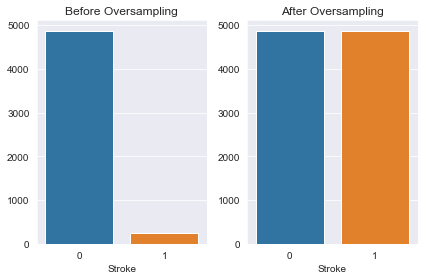

In [72]:
fig, (ax1, ax2) = plt.subplots(1,2)

sns.barplot(x=['0','1'], y = [sum(y==0), sum(y==1)], ax= ax1)
ax1.set_title('Before Oversampling')
ax1.set_xlabel('Stroke')

#Using SMOTE to balanced the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X,y)

sns.barplot(x=['0','1'], y=[sum(y==0), sum(y==1)], ax=ax2)
ax2.set_title('After Oversampling')
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

In [73]:
# Spliting the Data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

**6. Creating a Model for Stroke Prediction**

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 94.0%


In [77]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1422
           1       0.93      0.96      0.94      1495

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917

